<a href="https://colab.research.google.com/github/kaylanelira/metodos-numericos/blob/main/LE2_2_kgl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução da questão 10(b)

Use o método de coeficientes indeterminados para encontrar uma solução yp(t) a

(b) $y’’ + y = cos(t)$.

Onde $y(0) = y'(0) = 0$.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.integrate import odeint

# Solução Numérica



Transformando em uma EDO  de 1° ordem, criando a dupla v, tal que:

> $u = [y(t), y'(t)] = [u[0], u[1]]$

Isolando temos y'' = cos(t) - y. Assim
> $u' = [y'(t), y''(t)] = [u[1], cos(t) - u[0]]$



Assim, a ODEint irá utilizar os parâmetros:


*   $u'[t, t] = [y'(t), y''(t)]$ => a partir da função dudt
*   $u[0,0] = [y(0), y'(0)] = [0, 0]$



In [ ]:
# function dy/dt calculating [y'(0), y''(0)]
def Q10b(u, t):
  dydt = [u[1], np.cos(t)-u[0]];
  return dydt

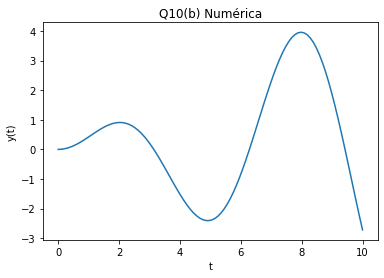

In [ ]:
# initial condition
u0 = [0, 0]
t0 = 0    # beginning time
tf = 10    # final time

#time points 
t = np.linspace(t0, tf, num=100)  

# solve ODE
u_num = odeint(Q10b, u0, t)

#plot results 
plt.title('Q10(b) Numérica')
plt.plot(t, u_num[ : ,0]) # ODE
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## Solução Analítica

Utilizando método dos Coeficientes Indeterminados:
> $yp(t) = M cos(\omega t) + N sen (\omega t)$

Tal que
> $M = \frac{C-A\omega^2}{D}$

> $N = \frac{B\omega}{D}$

> $D = ({C-A\omega^2})^2 + B^2\omega^2$

Substituindo na equação $y’’ + y = cos(t)$

$A = 1; \space B = 0; \space C = 1; \space \omega = 1$

E assim:
$D = 0; \space M = 0/0; \space N = 0/0$



O que remete a ressonância, transformando a solução:
> $yp(t) = Mt cos(\omega t) + Nt sen (\omega t)$

Substituindo $M = 0$ e $N = \frac{1}{2}$
> $yp(t) = \frac{1}{2}t \space sen(t)$

In [ ]:
def Q10b_analitic(t):
  dydt = 0.5 * t * np.sin(t);
  return dydt;

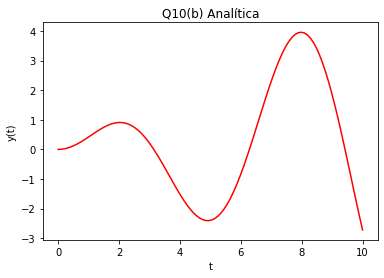

In [ ]:
# initial condition
u0 = [0, 0]
t0 = 0    # beginning time
tf = 10    # final time

# expected function
y_ana  = np.vectorize(Q10b_analitic) 

# plot results
plt.title('Q10(b) Analítica')
plt.plot(t, y_ana(t), 'r-')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## Comparando Analítica e Numérica

Comparando soluções numérica e analítica em um gráfico

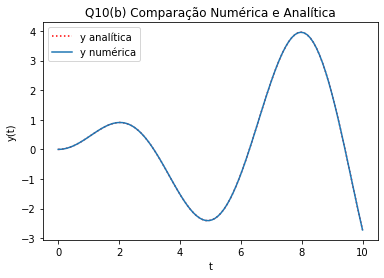

In [ ]:
y_ana = np.vectorize(Q10b_analitic)
y_num = odeint(Q10b, u0, t)

# plot analitics results 
plt.plot(t, y_ana(t), 'r:')
# plot numerical results 
plt.plot(t, u_num[ : ,0]) 

plt.title('Q10(b) Comparação Numérica e Analítica')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.legend(['y analítica','y numérica'])
plt.show()